In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [60]:
res = np.load("combined_cv_results.npy", allow_pickle=True).item()

## 5 x 5 frame 
    * correlation plots for random test rmse from each split

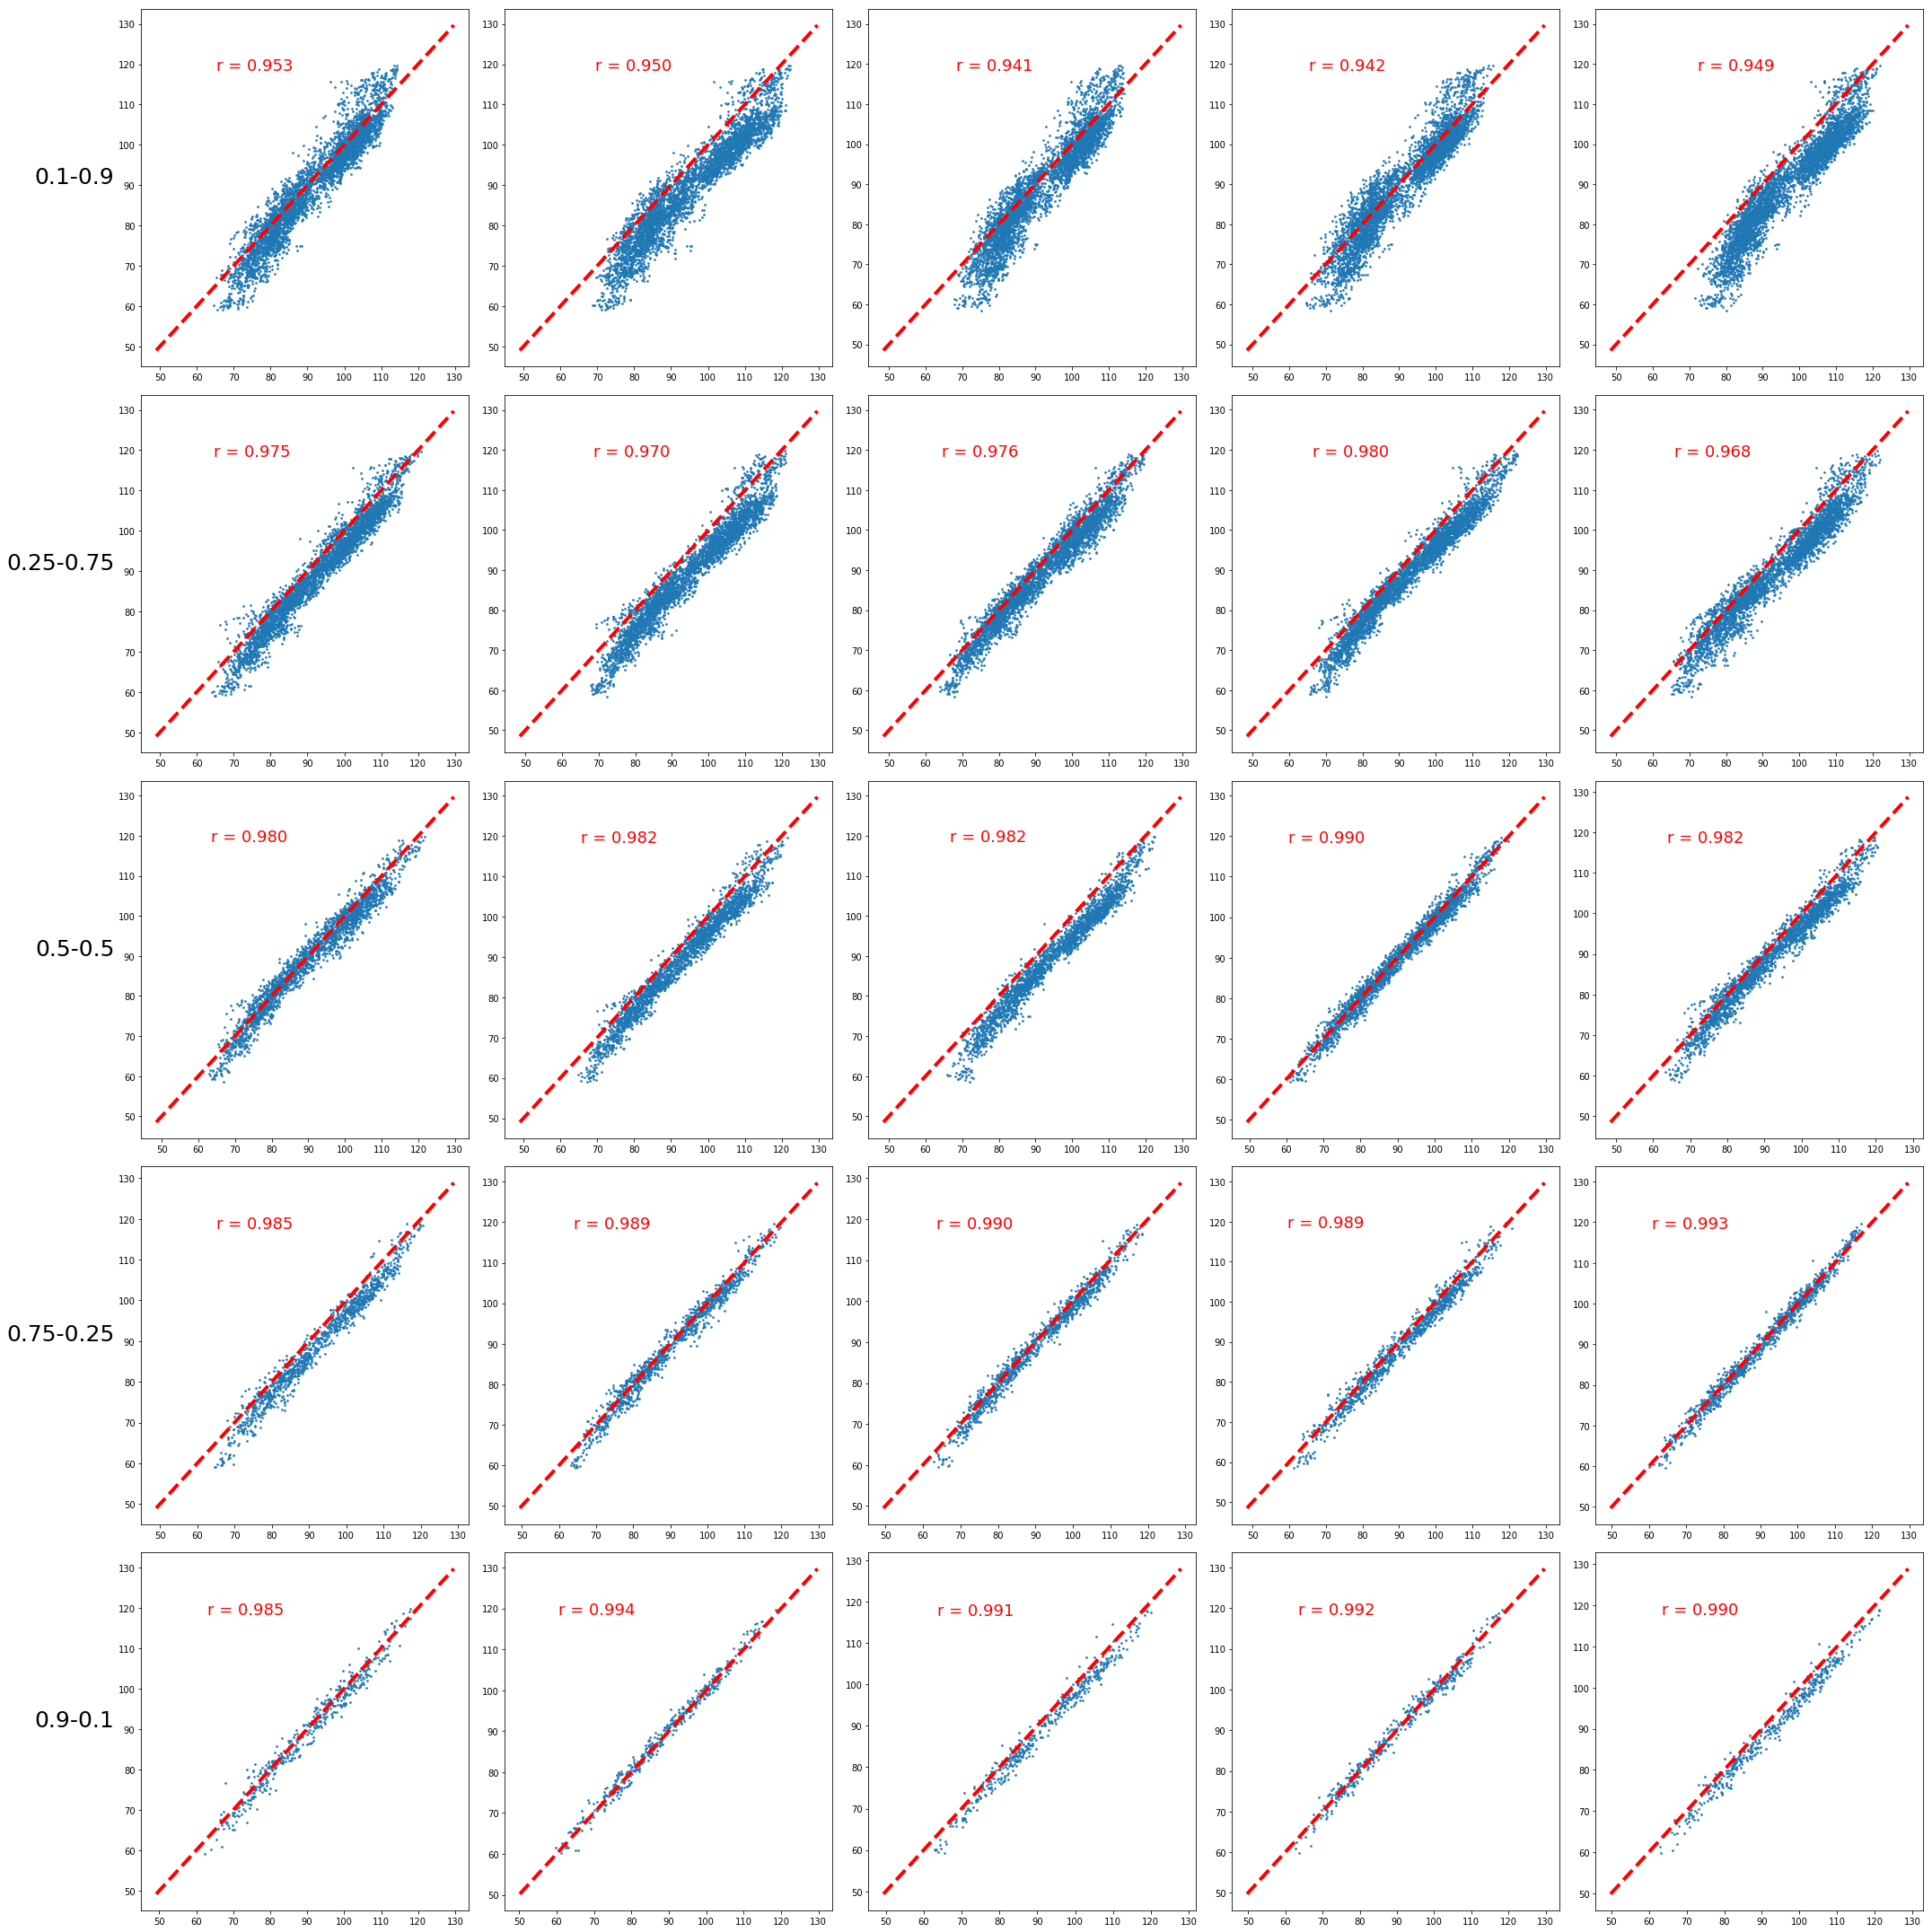

In [61]:
# fig = plt.figure(figsize=(30,30))

fig, axes = plt.subplots(nrows=len(res.keys()), ncols=5,figsize=(30,30))
for i, split in enumerate(res.keys()):
    ax_row =axes[i]
    
    fold_mask = np.arange(len(res[split]['rmse']))
    random_mask = np.random.choice(fold_mask,5)
                         
    for j, random_idx in enumerate(random_mask):
        ax = ax_row[j]    
        if j==0:
            ax.set_ylabel(split, fontsize=25, rotation=0,  ha='right')
           
        
        real = res[split]['test_labels'][random_idx]
        pred = res[split]['test_pred'][random_idx]

        r, _ = pearsonr(real, pred)

        ax.text(1.01*min(pred),0.99*max(real),"r = %.3f"%(r), fontsize=18, color='red')

        ax.plot([min(real)-10, max(real)+10], [min(real)-10, max(real)+10], 'r--', lw=4)
    #     ax.set_xlim(min(pred)-10,max(pred)+5)
    #     ax.set_ylim(min(pred)-10,max(pred)+5)

        ax.scatter(pred, real, alpha=0.9, s=3)
        #ax.set_title(split, fontsize=20)
#         ax.set_xlabel("Observed pA", fontsize=16)
#         
        plt.tight_layout()
        
# fig.text(-0.01, 0.5, split, ha='center',fontsize=26)# x axis label   
# fig.text(-0.01, 0.5, 'Observed pA', va='center', rotation='vertical',fontsize=26) # y axis label

plt.savefig("../plots/Combined_50-foldCV_corr_plots.png", dpi=600)
    